Part b: 

Multiple Linear Regression

Manushri Jayanthi - manushri.jayanthi@gmail.com


Name: Nandan D

SRN: PES2UG23CS363

Section: F



**Multiple Linear Regression (MLR) Analysis**

Multiple Linear Regression (MLR) is a statistical method used to model the relationship between one dependent variable and two or more independent variables. It is an extension of simple linear regression that allows for more complex, real-world scenarios where multiple factors influence an outcome.

In this worksheet, you’ll explore air pollution data across multiple U.S. cities and use statistical modeling techniques to understand how different pollutants contribute to overall air quality. The dataset includes concentrations of major pollutants—NO₂, SO₂, O₃, and CO—along with a precomputed Composite Pollution Index that summarizes overall pollution intensity on a given day.
Additionally,these pollutants are measured in different units—some in parts per million (ppm) and others in parts per billion (ppb)—reflecting differences in their typical atmospheric concentrations.

# **Data Understanding & Preprocessing**

Begin by loading the dataset and performing a basic exploration to understand its structure and identify any missing values.

In [27]:
# Load libraries
library(tidyverse)
library(car)       # for VIF
library(caret)     # for train_portion/test_portion splits, metrics
library(GGally)    # for correlation plots (optional)

# Load dataset
df <- read_csv("/kaggle/input/air-data/UE23CS342AA2_Level1_Dataset2b.csv",
               show_col_types = FALSE)

# Basic inspection
cat("Rows:", nrow(data_tbl), "| Columns:", ncol(data_tbl), "\n\n")

# Peek at the data
head(df)
glimpse(df)

# Check missing values
colSums(is.na(df))


Rows: 80168 | Columns: 21 



State Code,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,⋯,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Composite_Index
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Arizona,Phoenix,01-01-2010,32.443,48.377,18,45.281,0.013,0.034,⋯,30.175,3.336,5.635,23,9.306,1.057,2.027,4,NA,2.401217
4,Arizona,Phoenix,01-01-2010,31.463,48.605,18,45.243,0.014,0.034,⋯,28.983,3.368,6.060,23,9.494,0.950,1.597,5,18,3.011381
4,Arizona,Phoenix,01-01-2010,32.969,48.143,18,45.119,0.014,0.034,⋯,28.938,3.345,4.755,2,NA,1.039,1.978,4,NA,2.449541
4,Arizona,Phoenix,01-01-2010,32.452,47.715,18,44.807,0.013,0.034,⋯,30.052,3.328,4.691,2,NA,0.964,1.577,5,18,2.173985
4,Arizona,Phoenix,02-01-2010,35.280,50.992,9,47.984,0.010,0.025,⋯,21.196,4.004,6.907,22,9.090,0.983,2.089,22,NA,2.722745
4,Arizona,Phoenix,02-01-2010,36.679,51.057,9,48.365,0.010,0.025,⋯,21.095,4.015,6.736,22,10.359,0.941,1.300,3,15,1.699853


Rows: 80,168
Columns: 21
$ `State Code`        <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,…
$ State               <chr> "Arizona", "Arizona", "Arizona", "Arizona", "Arizo…
$ City                <chr> "Phoenix", "Phoenix", "Phoenix", "Phoenix", "Phoen…
$ `Date Local`        <chr> "01-01-2010", "01-01-2010", "01-01-2010", "01-01-2…
$ `NO2 Mean`          <dbl> 32.443, 31.463, 32.969, 32.452, 35.280, 36.679, 36…
$ `NO2 1st Max Value` <dbl> 48.377, 48.605, 48.143, 47.715, 50.992, 51.057, 51…
$ `NO2 1st Max Hour`  <dbl> 18, 18, 18, 18, 9, 9, 9, 9, 19, 19, 19, 19, 7, 7, …
$ `NO2 AQI`           <dbl> 45.281, 45.243, 45.119, 44.807, 47.984, 48.365, 46…
$ `O3 Mean`           <dbl> 0.013, 0.014, 0.014, 0.013, 0.010, 0.010, 0.010, 0…
$ `O3 1st Max Value`  <dbl> 0.034, 0.034, 0.034, 0.034, 0.025, 0.025, 0.025, 0…
$ `O3 1st Max Hour`   <dbl> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9,…
$ `O3 AQI`            <dbl> 30.175, 28.983, 28.938, 30.052, 21.196, 21.095, 22…
$ `SO2 Mean`   

State Code             State              City        Date Local 
                0                 0                 0                 0 
         NO2 Mean NO2 1st Max Value  NO2 1st Max Hour           NO2 AQI 
                0                 0                 0                 0 
          O3 Mean  O3 1st Max Value   O3 1st Max Hour            O3 AQI 
                0                 0                 0                 0 
         SO2 Mean SO2 1st Max Value  SO2 1st Max Hour           SO2 AQI 
                0                 0                 0             40072 
          CO Mean  CO 1st Max Value   CO 1st Max Hour            CO AQI 
                0                 0                 0             40073 
  Composite_Index 
                0

Q1)Based on the missing values identified, suggest a strategy to handle them. Before deciding whether to use SO2 AQI and CO AQI in your regression model, examine their correlation with the target variable Composite_Index.

In [28]:
colSums(is.na(df))

State Code             State              City        Date Local 
                0                 0                 0                 0 
         NO2 Mean NO2 1st Max Value  NO2 1st Max Hour           NO2 AQI 
                0                 0                 0                 0 
          O3 Mean  O3 1st Max Value   O3 1st Max Hour            O3 AQI 
                0                 0                 0                 0 
         SO2 Mean SO2 1st Max Value  SO2 1st Max Hour           SO2 AQI 
                0                 0                 0             40072 
          CO Mean  CO 1st Max Value   CO 1st Max Hour            CO AQI 
                0                 0                 0             40073 
  Composite_Index 
                0

In [29]:
aqi_corr <- df %>%
  select(`SO2 AQI`, `CO AQI`, Composite_Index)

# Correlation matrix (only complete cases)
cor(aqi_corr, use = "complete.obs")


,SO2 AQI,CO AQI,Composite_Index
SO2 AQI,1.0000000,0.1839505,0.3250435
CO AQI,0.1839505,1.0000000,0.3842901
Composite_Index,0.3250435,0.3842901,1.0000000


# **Standardization & Composite Pollution Index**

Before performing regression, it's important to standardize variables when they are on different scales or units (e.g., parts per billion vs parts per million). This helps ensure that no single variable disproportionately influences the results.

In this analysis, we will mainly focus on the following four pollutants as predictors of pollution severity:

NO₂ Mean

SO₂ Mean

O₃ Mean

CO Mean


2)Standardize the above four columns using z-score normalization.


In [30]:
pollutants <- df %>%
  select(`NO2 Mean`, `SO2 Mean`, `O3 Mean`, `CO Mean`)

In [31]:
pollutants_std <- as.data.frame(scale(pollutants))

# Add Composite_Index back (target variable)
df_std <- cbind(pollutants_std, Composite_Index = data_tbl$Composite_Index)

head(df_std)

,NO2 Mean,SO2 Mean,O3 Mean,CO Mean,Composite_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.412552,1.373529,-1.275397,3.043508,2.401217
2,2.298768,1.393983,-1.180729,2.586647,3.011381
3,2.473623,1.379281,-1.180729,2.966653,2.449541
4,2.413597,1.368415,-1.275397,2.646423,2.173985
5,2.741944,1.800509,-1.559404,2.727548,2.722745
6,2.904376,1.807540,-1.559404,2.548219,1.699853


Conceptual Question: How might different weighting schemes (e.g., giving more weight to NO₂) affect the interpretation of the Composite Pollution Index?

If we assign different weights to pollutants when creating a Composite Index:

Giving higher weight to NO₂ -> the index will be more sensitive to NO₂ variations (dominates interpretation).

Equal weights (as in z-score scaling) -> all pollutants contribute equally.

Weighted indices are often used in policy decisions (e.g., prioritizing pollutants harmful to health).

##  Exploratory Analysis

3)Compute the correlation matrix for the standardized pollutant variables (NO2 Mean, SO2 Mean, O3 Mean, CO Mean).

Based on the results, are any of the predictors highly correlated (e.g., correlation coefficient > 0.8 or < -0.8)?

Discuss how high correlation among predictors can affect your regression model.

In [32]:
corr_matrix <- cor(df_std %>% select(`NO2 Mean`, `SO2 Mean`, `O3 Mean`, `CO Mean`))

print(corr_matrix)

           NO2 Mean   SO2 Mean    O3 Mean    CO Mean
NO2 Mean  1.0000000  0.3239434 -0.4721451  0.6091396
SO2 Mean  0.3239434  1.0000000 -0.1116706  0.2367931
O3 Mean  -0.4721451 -0.1116706  1.0000000 -0.3231546
CO Mean   0.6091396  0.2367931 -0.3231546  1.0000000


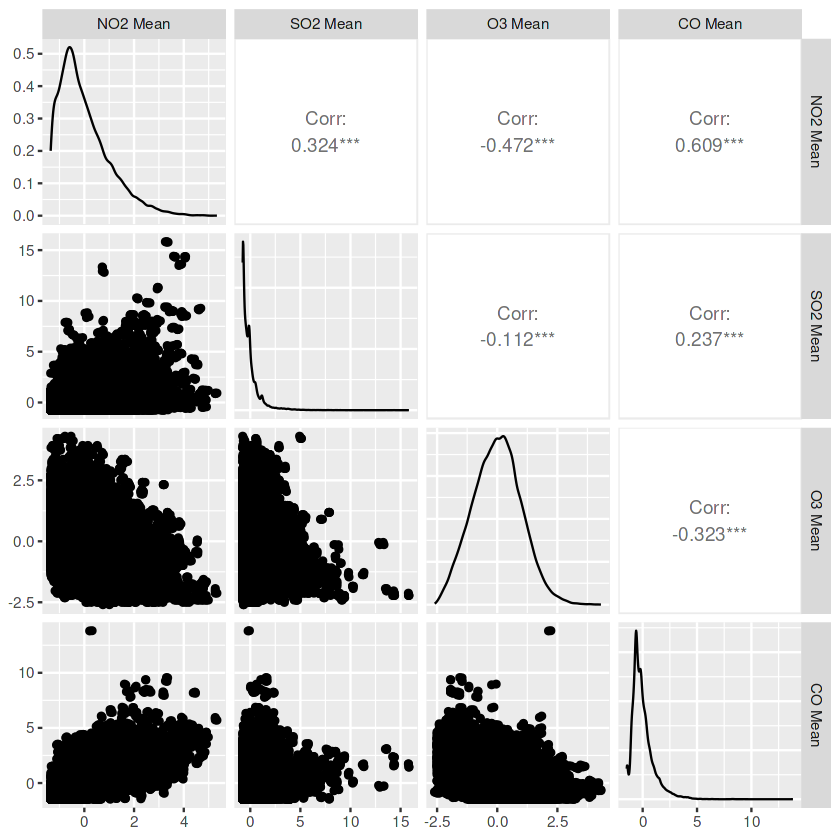

In [33]:
library(GGally)

# Pairwise correlation plot
ggpairs(df_std %>% select(`NO2 Mean`, `SO2 Mean`, `O3 Mean`, `CO Mean`))


4)While correlation helps spot pairwise relationships, VIF gives a more complete picture of how much each variable is linearly explained by all the others.

(a) Compute the VIF values for the four standardized variables:
NO2 Mean, SO2 Mean, O3 Mean, CO Mean

(b) Do any of the predictors show evidence of multicollinearity (e.g., VIF significantly greater than 5)?

(c) What would it imply for your model if high multicollinearity were present among the predictors?

In [34]:
mlr_model <- lm(Composite_Index ~ `NO2 Mean` + `SO2 Mean` + `O3 Mean` + `CO Mean`, 
                data = df_std)

In [35]:
library(car)
vif_values <- vif(mlr_model)
print(vif_values)

`NO2 Mean` `SO2 Mean`  `O3 Mean`  `CO Mean` 
  1.945311   1.123417   1.293747   1.598959 


# **Fit a Multiple Linear Regression Model**







5)Using the standardized predictors (NO2 Mean, SO2 Mean, O3 Mean, CO Mean),
fit a Multiple Linear Regression model to predict the Composite_Index.



In [36]:
mlr_model <- lm(Composite_Index ~ `NO2 Mean` + `SO2 Mean` + `O3 Mean` + `CO Mean`, 
                data = df_std)

# Summary of trained_model
summary(mlr_model)
    


Call:
lm(formula = Composite_Index ~ `NO2 Mean` + `SO2 Mean` + `O3 Mean` + 
    `CO Mean`, data = df_std)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43148 -0.34940  0.00476  0.35418  1.92928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.217988   0.001862 654.286  < 2e-16 ***
`NO2 Mean`  0.299542   0.002596 115.368  < 2e-16 ***
`SO2 Mean`  0.160931   0.001973  81.562  < 2e-16 ***
`O3 Mean`   0.013235   0.002117   6.251 4.11e-10 ***
`CO Mean`   0.018869   0.002354   8.016 1.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5271 on 80163 degrees of freedom
Multiple R-squared:  0.3526,	Adjusted R-squared:  0.3526 
F-statistic: 1.092e+04 on 4 and 80163 DF,  p-value: < 2.2e-16


Q6. Report and Interpret R² and Adjusted R²

a) What are the values of R² and Adjusted R² for your model?

b) What do they indicate about your model’s performance?

c) What could cause these values to be high or low?

In [37]:
mlr_summary <- summary(mlr_model)

# Extract R² and Adjusted R²
r2 <- mlr_summary$r.squared
adj_r2 <- mlr_summary$adj.r.squared

cat(sprintf("R²: %.3f | Adjusted R²: %.3f\n", r2, adj_r2))

R²: 0.353 | Adjusted R²: 0.353


# **OLS Assumption Checks**

1) Check whether the relationship between the predictors and the target variable is linear. Plot the residuals vs. the fitted values. What do you observe?


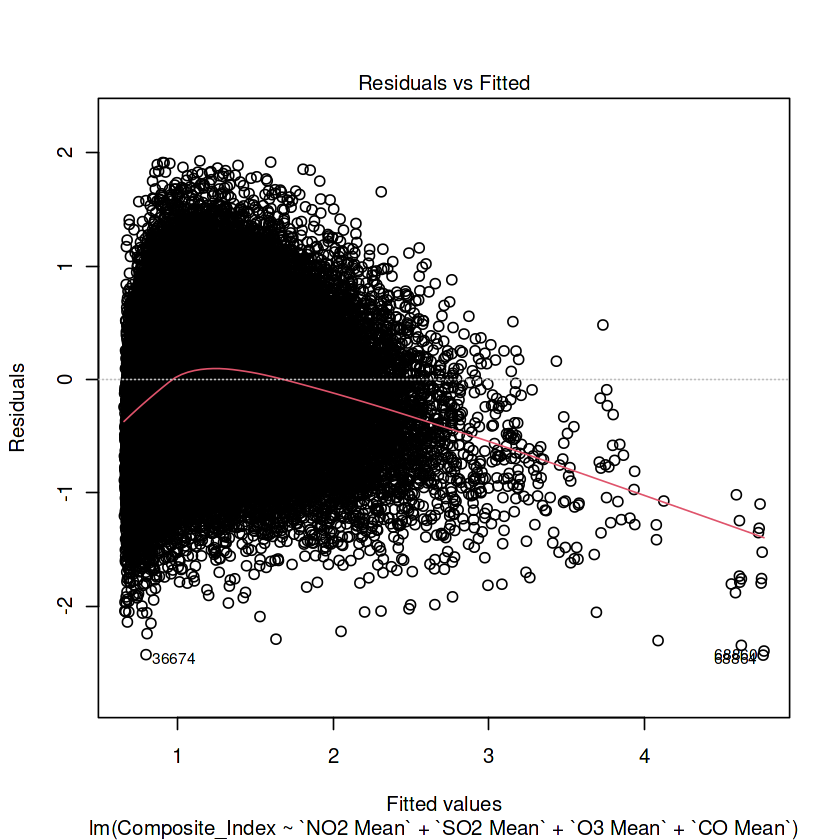

In [38]:
plot(mlr_model, which = 1)  

2)Are the residuals normally distributed?

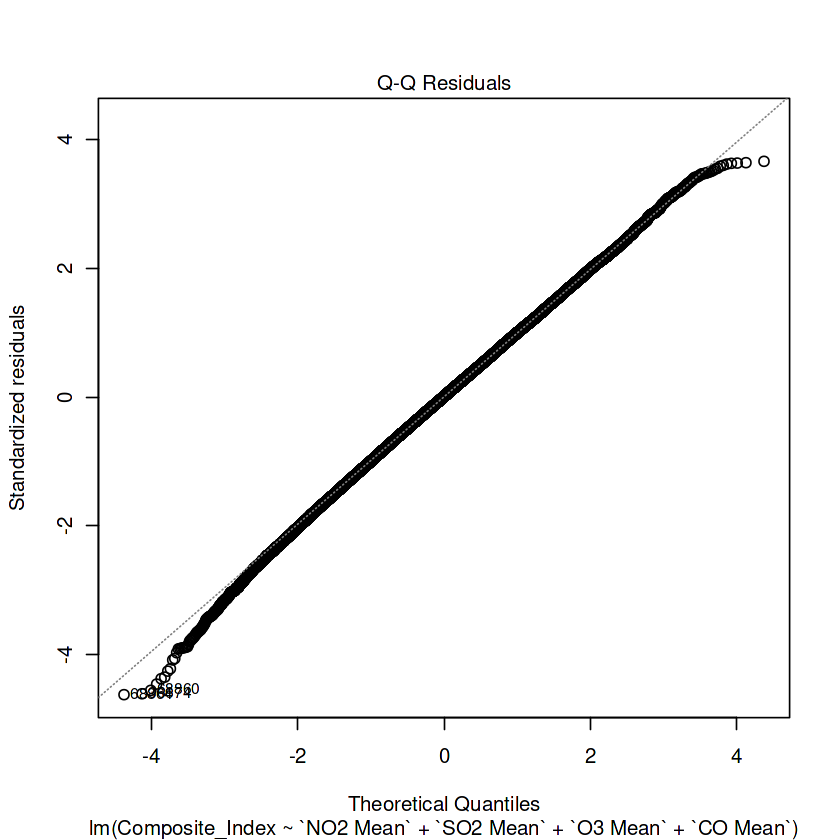

In [39]:
# Q-Q plot
plot(mlr_model, which = 2)  

3)Test for autocorrelation of residuals

In [40]:
library(lmtest)

# Durbin-Watson test_portion for autocorrelation
dwtest(mlr_model)



	Durbin-Watson test

data:  mlr_model
DW = 1.8357, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


# **CONCLUSION**

Suggest at least one way the regression model could be improved or extended in future analyses.

The current model explains a significant portion of the variation in Composite_Index using pollutant levels. However, improvements can be made by adding interaction terms, handling multicollinearity (via PCA or dropping variables), and exploring advanced regression techniques (Ridge, Lasso). Including additional external variables like weather could further improve prediction accuracy.
